
# Artificial Neural Network


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Activation
from tensorflow.keras.datasets import mnist


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()    # Load the MNIST dataset


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### samples of image

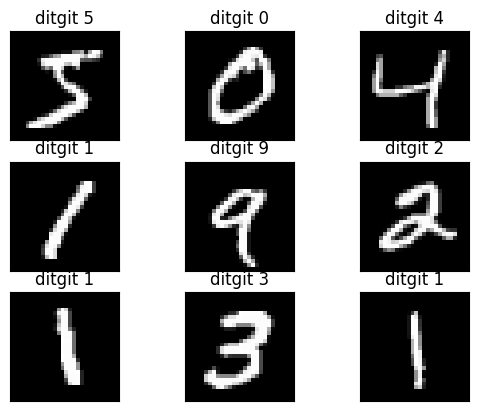

In [6]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', )
    plt.title("ditgit {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
    

In [7]:
x_train = x_train.reshape(60000, 784).astype('float32') # Flatten the images to 1D array
x_test = x_test.reshape(10000, 784).astype('float32')


In [8]:
x_train /= 255.0 # Normalize the images to a range of 0 to 1
x_test /= 255.0

In [9]:
print("befour{}".format(y_train.shape))
y_train = tf.keras.utils.to_categorical(y_train, 10) # One-hot encode the labels
y_test = tf.keras.utils.to_categorical(y_test, 10)
print("after{}".format(y_train.shape))

befour(60000,)
after(60000, 10)


In [10]:
model=Sequential()# Create the model
model.add(Dense(512, input_shape=(784,),activation='relu')) # Add a dense layer
model.add(Dropout(0.2)) # Add some dropout for better generalization
model.add(Dense(512, activation='relu')) # Add another dense layer
model.add(Dropout(0.2)) # Add some dropout for better generalization
model.add(Dense(10, activation='softmax')) # Add a dense layer with 10 neurons

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile the model
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test)) # Train the model


/opt/conda/envs/quant/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


2024-09-05 07:51:47.858271: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


 11/469 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3885 - loss: 1.8877  

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8634 - loss: 0.4496

2024-09-05 07:51:53.631313: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8641 - loss: 0.4475 - val_accuracy: 0.9675 - val_loss: 0.1058
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9670 - loss: 0.1043 - val_accuracy: 0.9752 - val_loss: 0.0797
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9777 - loss: 0.0707 - val_accuracy: 0.9786 - val_loss: 0.0703
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9837 - loss: 0.0513 - val_accuracy: 0.9798 - val_loss: 0.0638
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9868 - loss: 0.0418 - val_accuracy: 0.9786 - val_loss: 0.0702
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9879 - loss: 0.0374 - val_accuracy: 0.9780 - val_loss: 0.0763
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9886 - loss: 0.0344 - val_accuracy: 0.9811 - val_loss: 0.0668
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9895 - loss: 0.0293 - val_accuracy: 0.98

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test) # Evaluate the model    
print("Accuracy", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.9733 - loss: 0.0830
Accuracy 0.9771999716758728
